In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval

from collections import OrderedDict

In [2]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#E69F00",
    "Stouffer":"#D44400",
    "REM":"#009E73",
    "RankProd":"#2E5EAA"
})

# Read results

In [3]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/"

dfs = {}

workdir = root_dir + "01_smaller_lib_downsampled_PG_MajorPG/results" 
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["TMT_downsampled"] = df

workdir = root_dir + "01_smaller_lib_imbalanced_PG_MajorPG/results"
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["TMT_imbalanced"] = df


print(dfs["TMT_imbalanced"].shape)
dfs["TMT_imbalanced"].head(4)

Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_downsampled_PG_MajorPG/results with 323 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_imbalanced_PG_MajorPG/results with 323 genes. Adj.p-values were not log-transformed.


(323, 12)


,pv_DEqMS,lfc_DEqMS,pv_FedProt,lfc_FedProt,lfc_Fisher,pv_Fisher,lfc_REM,pv_REM,pv_Stouffer,lfc_Stouffer,pv_RankProd,lfc_RankProd
A0A075B6I9;P04211,0.000162,0.699422,0.000162,0.699422,0.716534,0.000399,0.721921,1.963005e-07,0.000287,0.716534,1.384317e-04,0.716534
A0A0B4J1U7,0.000162,0.972351,0.000162,0.972351,1.016633,0.000083,0.886297,6.743167e-10,0.000033,1.016633,3.616361e-07,1.016633
A0A0B4J1Y9,0.001804,0.682852,0.001804,0.682852,0.702106,0.001005,0.596326,1.963005e-07,0.000699,0.702106,5.196659e-04,0.702106
A0A0B4J2H0;A0A0C4DH29;P01742;P01743;P0DP01,0.016438,0.564371,0.016438,0.564371,0.592536,0.022154,0.494844,2.957160e-03,0.026304,0.592536,3.662235e-03,0.592536


In [4]:
# log transform p-values in dfs, but first replace 0 with tiny value
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df


# Deviations in the results of decentralized methods

First - for balanced.  
adj. p-val:
- min diff (supplementary)
- mean diff,
- max diff, 
- r, 
- rho

log2FC - same, for supplementary.
  




## stats tables

In [5]:
for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        dfs[dataset], 
        lfc_thr=0.25, adj_pval_thr=0.05,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    logfc_basic_stats = fp_eval.calc_stats(
        dfs[dataset],
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="lfc_",
        top_genes=-1
    )

    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/pval_basic_stats.csv')
    logfc_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/logfc_basic_stats.csv')

    print(f'Dataset: {dataset}')
    print("\tLogFC basic stats:")
    print(logfc_basic_stats)
    print("\tP-value basic stats:")
    print(pval_basic_stats)        

Calculating corrs. Using p-vals - not log-transformed.
Correlations computed for all genes from pv_ columns.
Correlations computed for all genes from lfc_ columns.
Calculating corrs. Using p-vals - not log-transformed.
Correlations computed for all genes from pv_ columns.
Correlations computed for all genes from lfc_ columns.


Dataset: TMT_downsampled
	LogFC basic stats:
               MinDiff      MeanDiff       MaxDiff         r         ρ
FedProt   0.000000e+00  1.003706e-14  3.561040e-14  1.000000  1.000000
Fisher    9.716900e-11  3.336608e-04  8.423249e-02  0.999843  0.999857
Stouffer  9.716900e-11  3.336608e-04  8.423249e-02  0.999843  0.999857
REM       5.300411e-05  2.389806e-02  1.406928e-01  0.993708  0.992639
RankProd  9.716900e-11  3.336608e-04  8.423249e-02  0.999843  0.999857
	P-value basic stats:
           MinDiff      MeanDiff       MaxDiff         r         ρ
FedProt   0.000000  4.180541e-14  4.002354e-13  1.000000  1.000000
Fisher    0.000007  1.553493e-01  8.057527e-01  0.767677  0.865196
Stouffer  0.000003  2.625171e-01  8.324285e-01  0.583893  0.747303
REM       0.000031  8.268859e-02  6.118532e-01  0.931372  0.948865
RankProd  0.000009  1.422111e-01  6.409555e-01  0.801196  0.835565
Dataset: TMT_imbalanced
	LogFC basic stats:
           MinDiff      MeanDiff       MaxDiff         r     

In [6]:
for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.25, adj_pval_thr=0.05,
        stats=[ "MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/log10pval_basic_stats.csv')
    
    print(f'Dataset: {dataset}')
    print("\tP-value basic stats:")
    # print round values to 3 digits
    print(pval_basic_stats.round(3))     
    # print(pval_basic_stats)

Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.
Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.


Dataset: TMT_downsampled
	P-value basic stats:
          MeanDiff  MaxDiff      r      ρ
FedProt      0.000    0.000  1.000  1.000
Fisher       0.393    1.210  0.940  0.866
Stouffer     0.499    1.503  0.921  0.748
REM          0.314    4.324  0.919  0.949
RankProd     0.470    4.776  0.744  0.836
Dataset: TMT_imbalanced
	P-value basic stats:
          MeanDiff  MaxDiff      r      ρ
FedProt      0.000    0.000  1.000  1.000
Fisher       0.310    1.531  0.924  0.882
Stouffer     0.423    1.943  0.891  0.782
REM          0.416    5.381  0.875  0.928
RankProd     0.563    3.180  0.675  0.698


### correlation plots

Plotting corrs using p-vals - log-transformed.


TMT_downsampled           TMT_imbalanced          
                       r         ρ              r         ρ
FedProt         1.000000  1.000000       1.000000  1.000000
Fisher          0.939693  0.866444       0.924547  0.883127
Stouffer        0.921366  0.749643       0.889510  0.776911
REM             0.919016  0.949338       0.875292  0.928455
RankProd        0.744923  0.837076       0.675877  0.697759

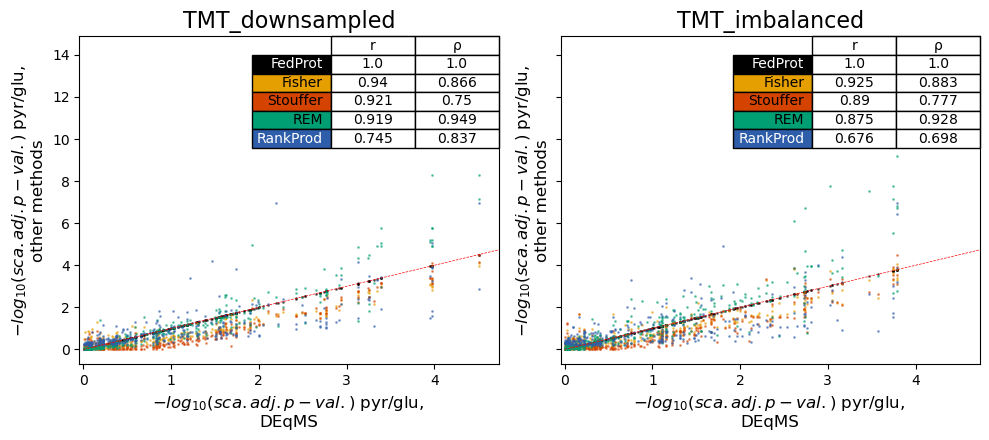

In [7]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["TMT_downsampled", "TMT_imbalanced"],
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using logFC values.


TMT_downsampled           TMT_imbalanced          
                       r         ρ              r         ρ
FedProt         1.000000  1.000000       1.000000  1.000000
Fisher          0.999850  0.999858       0.993956  0.991874
Stouffer        0.999850  0.999858       0.993956  0.991874
REM             0.993996  0.992707       0.987819  0.986180
RankProd        0.999850  0.999858       0.993956  0.991874

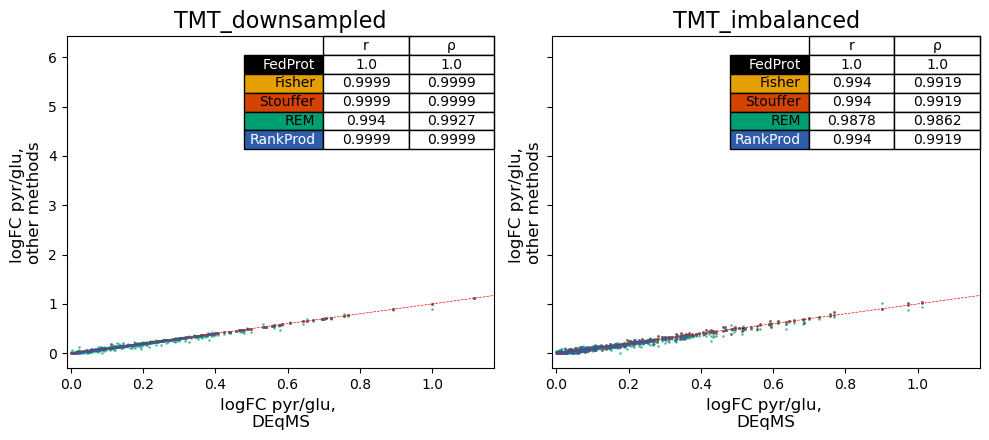

In [8]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=["TMT_downsampled", "TMT_imbalanced"],
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

# The consistency of differentially expressed protein lists


In [9]:
# calculate FP, FN and F1

for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.25, adj_pval_thr=0.05,
        stats=["FP", "FN", "Jaccard"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    print(f'Dataset: {dataset}')
    print("\tFP, FN and F1:")
    print(pval_basic_stats)

    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/fp_fn_f1.csv')

Performance metrics calculated for all genes.
Performance metrics calculated for all genes.


Dataset: TMT_downsampled
	FP, FN and F1:
           FP    FN   Jaccard
FedProt   0.0   0.0  1.000000
Fisher    0.0  24.0  0.707317
Stouffer  0.0  32.0  0.609756
REM       2.0  17.0  0.773810
RankProd  9.0  23.0  0.648352
Dataset: TMT_imbalanced
	FP, FN and F1:
            FP    FN   Jaccard
FedProt    0.0   0.0  1.000000
Fisher     2.0  17.0  0.768293
Stouffer   0.0  23.0  0.712500
REM        9.0  13.0  0.752809
RankProd  15.0  28.0  0.547368


In [10]:
# Number of significant genes in DEqMS
for dataset in dfs:
    # get number of significant genes in DEqMS
    n_significant_DEqMS = dfs[dataset][(dfs[dataset]["pv_DEqMS"] < 0.05) & (dfs[dataset]["lfc_DEqMS"] > 0.25)].shape[0]
    print(f'Dataset: {dataset}')
    print(f'Number of significant genes in DEqMS: {n_significant_DEqMS}')

Dataset: TMT_downsampled
Number of significant genes in DEqMS: 51
Dataset: TMT_imbalanced
Number of significant genes in DEqMS: 56


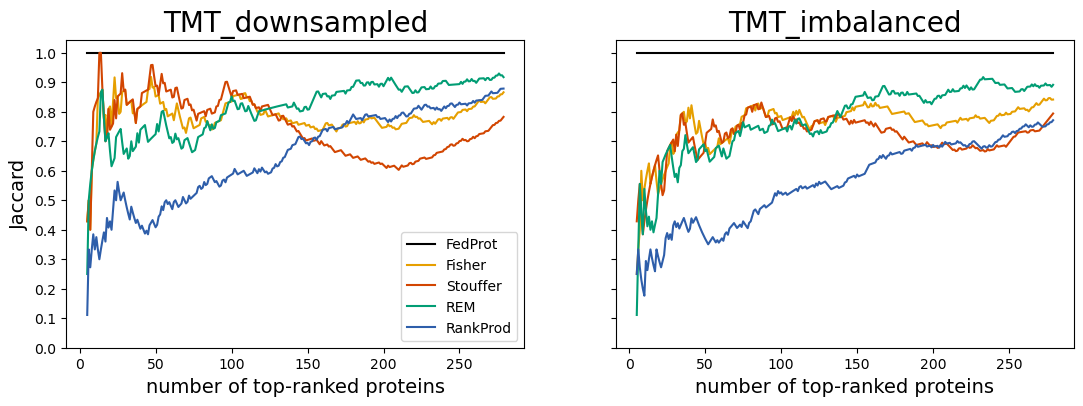

In [11]:
min_n_genes = 5
step = 1
max_n_genes = 280

data = fp_eval.plot_stats_for_topN(
    log_dfs,
    datasets = ["TMT_downsampled", "TMT_imbalanced"],
    methods=["FedProt", "Fisher","Stouffer","REM","RankProd"],
    metrics=["Jaccard"],
    min_n_genes=min_n_genes,
    max_n_genes=max_n_genes,
    step=step,
    color_dict=color_dict,
    sharey=True
    )